In [1]:
from matplotlib import pyplot as plt

def show(img, title=""):
    plt.figure(figsize = (15,15))
    plt.title(title)
    plt.imshow(img)
    plt.show()

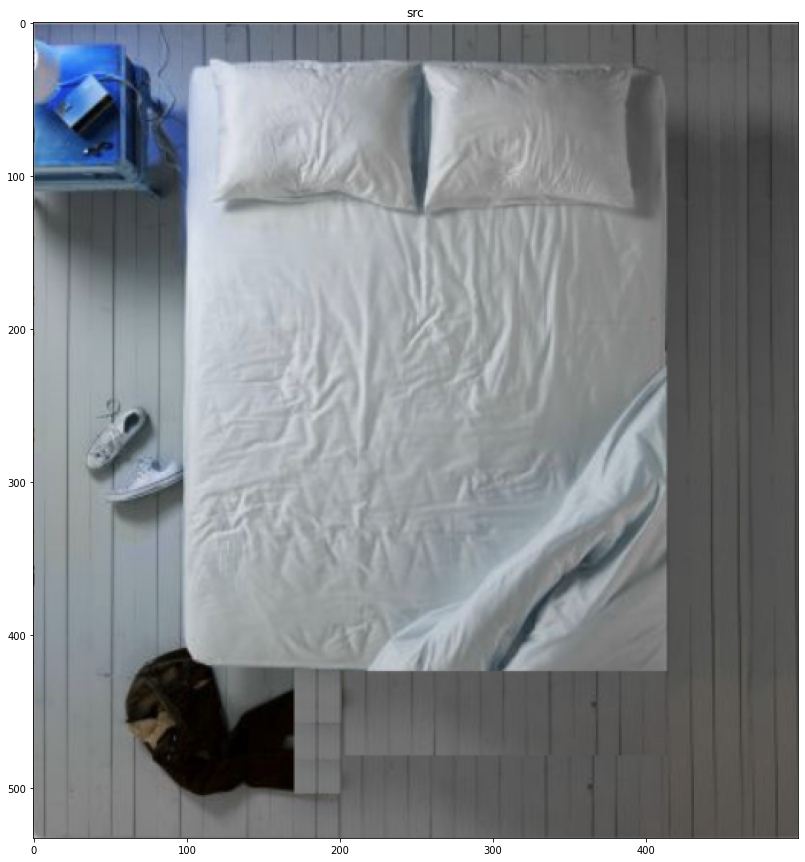

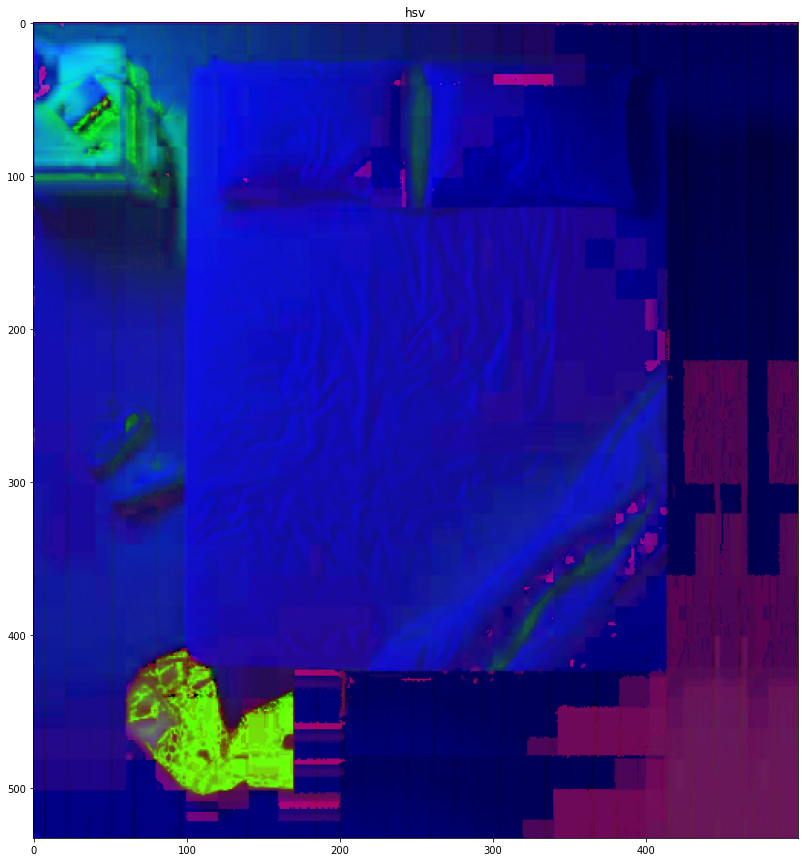

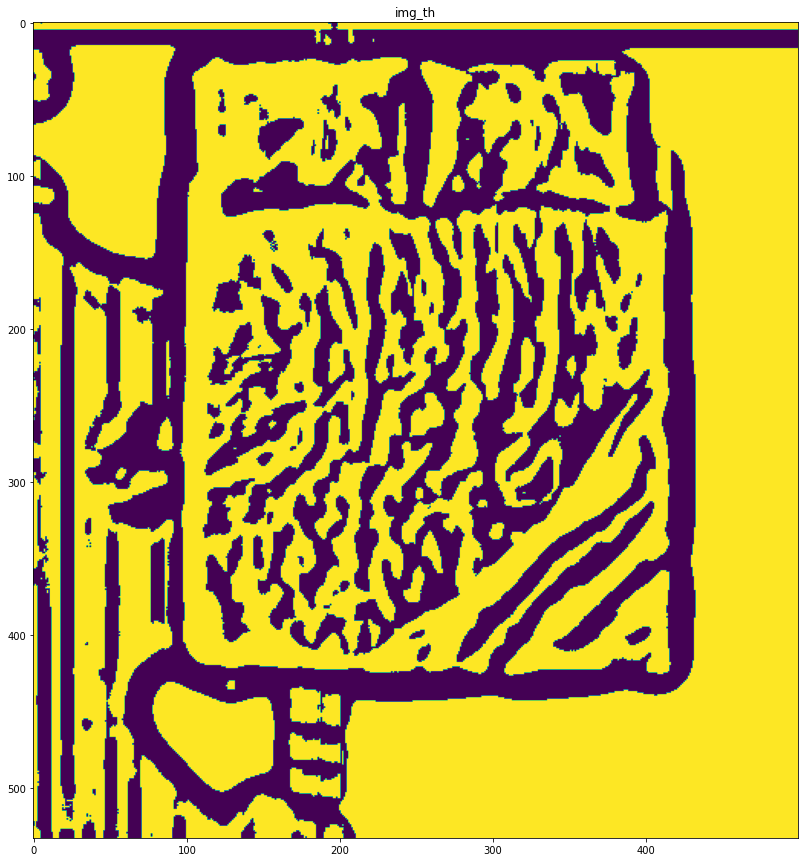

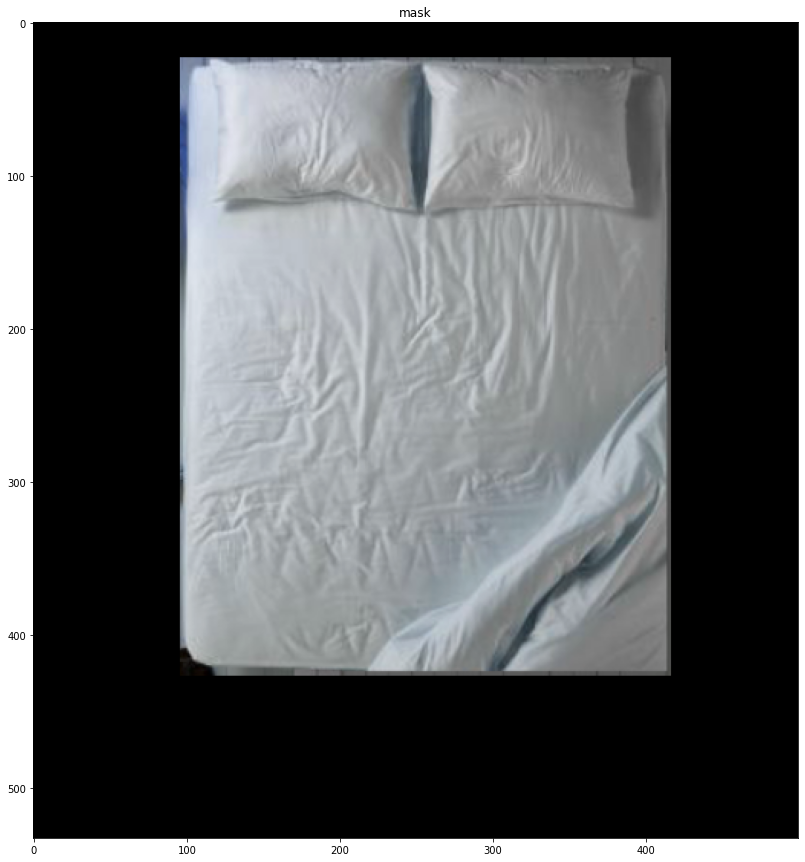

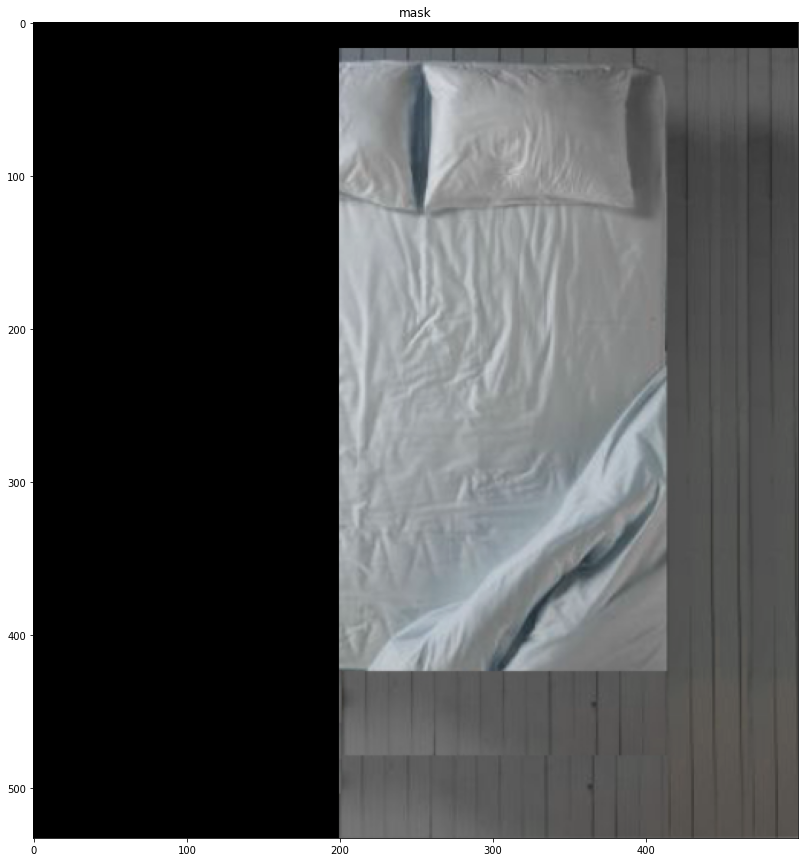

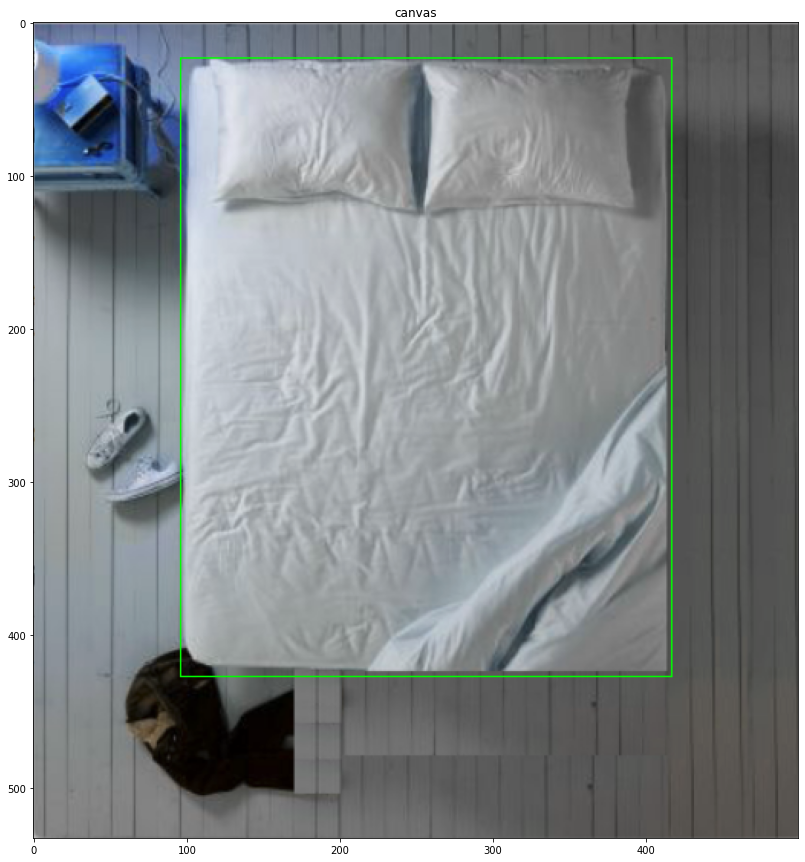

True

In [5]:
# https://stackoverflow.com/questions/42721213/python-opencv-extrapolating-the-largest-rectangle-off-of-a-set-of-contour-poin

import cv2
import numpy as np

cv2.startWindowThread()

def clahe(img, clip_limit=2.0, grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(img)

src = cv2.imread("images/bed.png")
# opencv uses BGR https://stackoverflow.com/a/39904259/9290771
# optionally switch to RGB
# b,g,r = cv2.split(src)           # get b, g, r
#src = cv2.merge([r,g,b])     # switch it to r, g, b
show(src, "src")

# HSV thresholding to get rid of as much background as possible
hsv = cv2.cvtColor(src.copy(), cv2.COLOR_BGR2HSV)
show(hsv, "hsv")

lower_blue = np.array([0, 0, 120])
upper_blue = np.array([180, 38, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(src, src, mask=mask)
b, g, r = cv2.split(result)
g = clahe(g, 5, (3, 3))

# Adaptive Thresholding to isolate the bed
img_blur = cv2.blur(g, (9, 9))
img_th = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 51, 2)
show(img_th, "img_th")

contours, hierarchy = cv2.findContours(img_th,
                                           cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)

# Filter the rectangle by choosing only the big ones
# and choose the brightest rectangle as the bed
max_brightness = 0
canvas = src.copy()
for cnt in contours:
    rect = cv2.boundingRect(cnt)
    x, y, w, h = rect
    if w*h > 40000:
        mask = np.zeros(src.shape, np.uint8)
        mask[y:y+h, x:x+w] = src[y:y+h, x:x+w]
        brightness = np.sum(mask)
        if brightness > max_brightness:
            brightest_rectangle = rect
            max_brightness = brightness
        show(mask, "mask")

x, y, w, h = brightest_rectangle
cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 1)
show(canvas, "canvas")
cv2.imwrite("result.jpg", canvas)

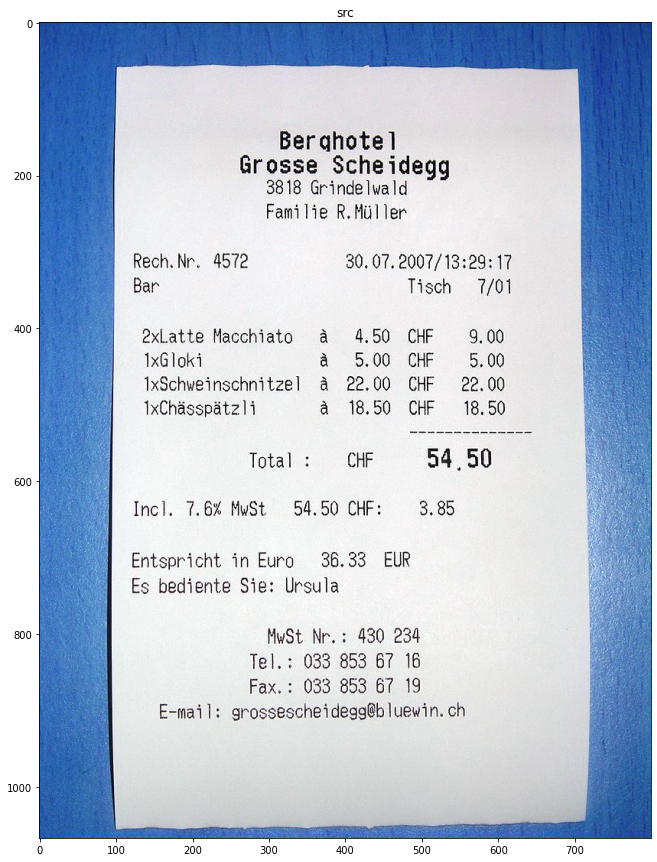

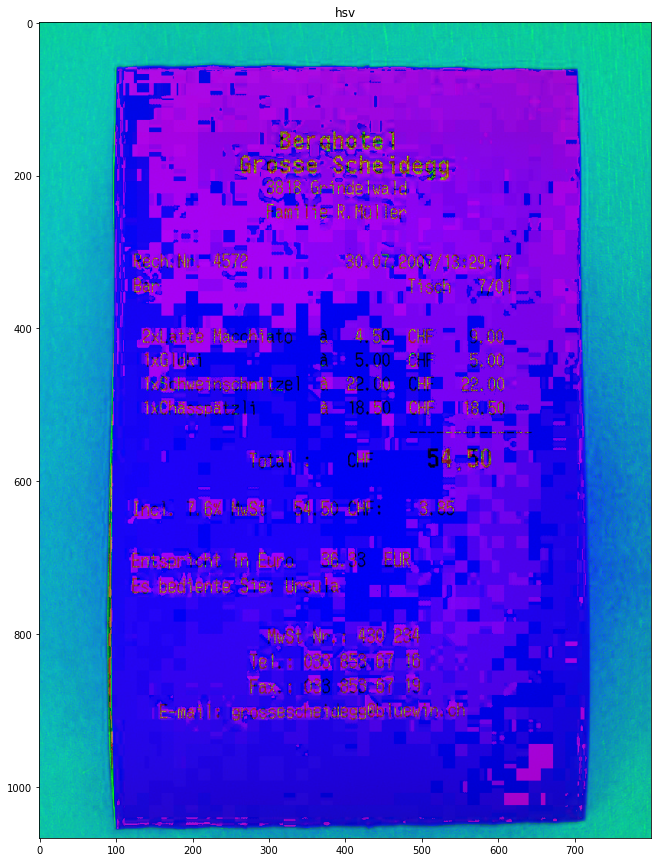

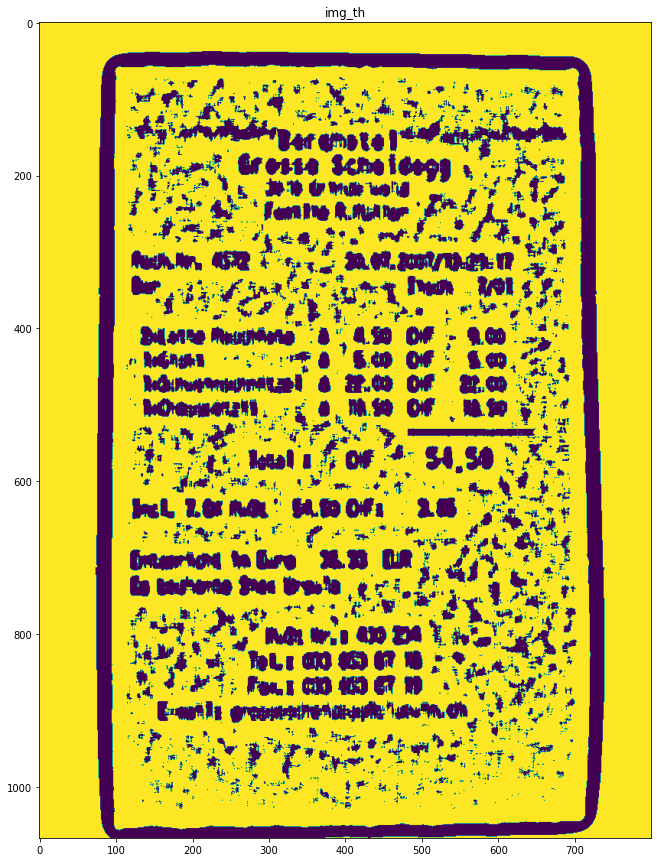

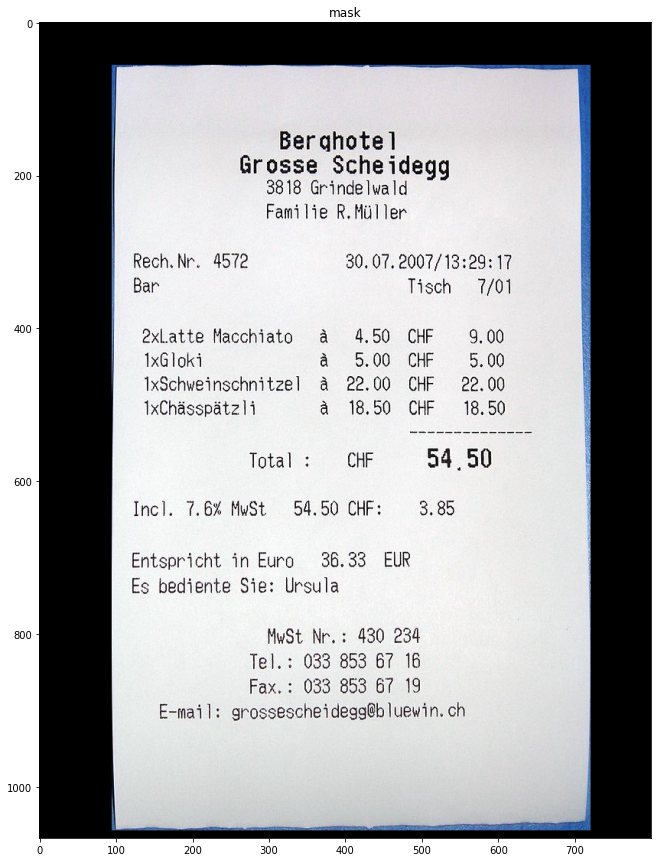

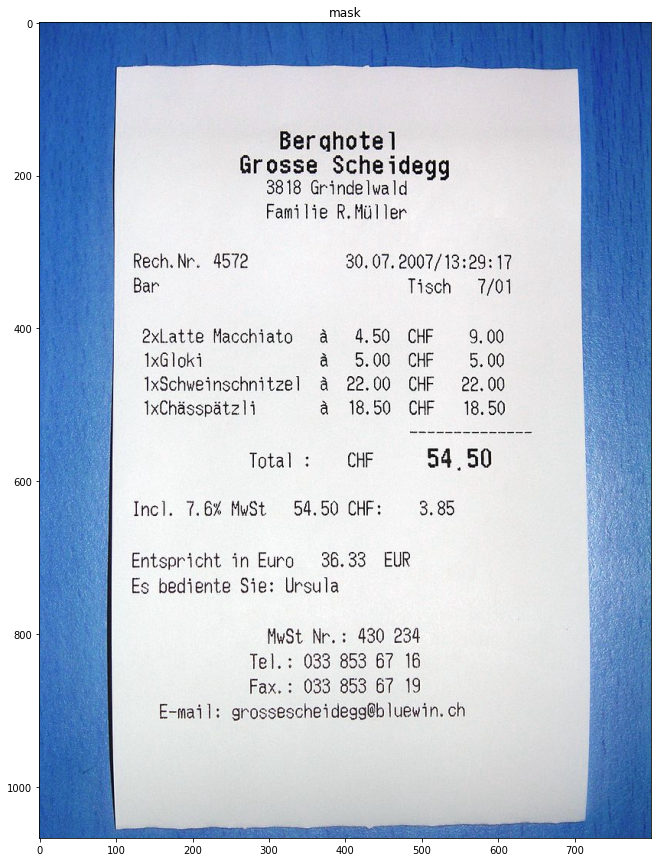

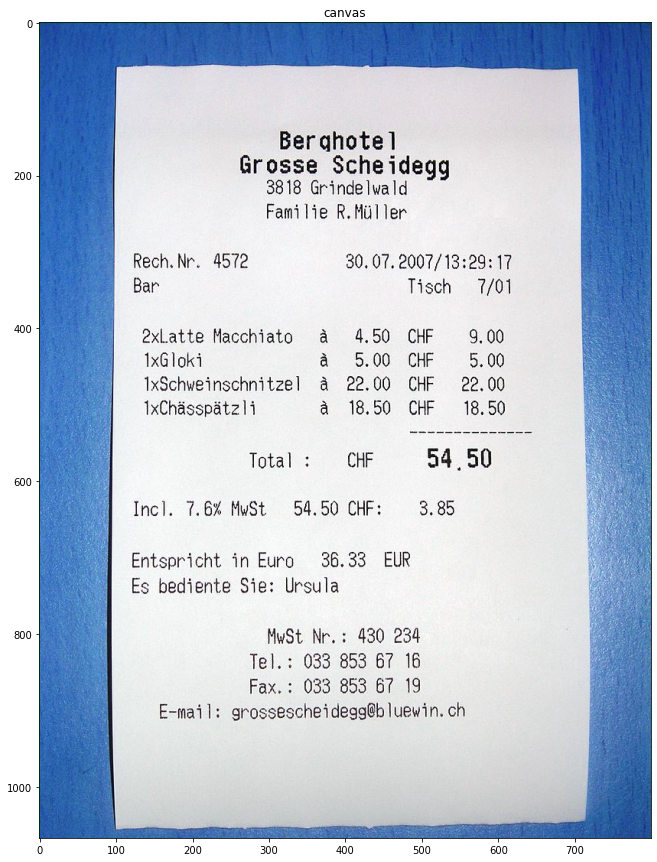

True

In [2]:
import cv2
import numpy as np

cv2.startWindowThread()

def clahe(img, clip_limit=2.0, grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(img)

src = cv2.imread("images/receipt_edges.jpeg")
# opencv uses BGR https://stackoverflow.com/a/39904259/9290771
# optionally switch to RGB
# b,g,r = cv2.split(src)           # get b, g, r
#src = cv2.merge([r,g,b])     # switch it to r, g, b
show(src, "src")

# HSV thresholding to get rid of as much background as possible
hsv = cv2.cvtColor(src.copy(), cv2.COLOR_BGR2HSV)
show(hsv, "hsv")

lower_blue = np.array([0, 0, 120])
upper_blue = np.array([180, 38, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
result = cv2.bitwise_and(src, src, mask=mask)
b, g, r = cv2.split(result)
g = clahe(g, 5, (3, 3))

# Adaptive Thresholding to isolate the bed
img_blur = cv2.blur(g, (9, 9))
img_th = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 51, 2)
show(img_th, "img_th")

contours, hierarchy = cv2.findContours(img_th,
                                           cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)

# Filter the rectangle by choosing only the big ones
# and choose the brightest rectangle as the bed
max_brightness = 0
canvas = src.copy()
for cnt in contours:
    rect = cv2.boundingRect(cnt)
    x, y, w, h = rect
    if w*h > 40000:
        mask = np.zeros(src.shape, np.uint8)
        mask[y:y+h, x:x+w] = src[y:y+h, x:x+w]
        brightness = np.sum(mask)
        if brightness > max_brightness:
            brightest_rectangle = rect
            max_brightness = brightness
        show(mask, "mask")

x, y, w, h = brightest_rectangle
cv2.rectangle(canvas, (x, y), (x+w, y+h), (0, 255, 0), 1)
show(canvas, "canvas")
cv2.imwrite("result.jpg", canvas)